## SF crime data analysis and modeling

##### In this notebook, you can learn how to use Spark SQL for big data analysis on SF crime data. (https://data.sfgov.org/Public-Safety/Police-Department-Incident-Reports-Historical-2003/tmnf-yvry).

In [0]:
from csv import reader
from pyspark.sql import Row 
from pyspark.sql import SparkSession
from pyspark.sql.types import *
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import warnings

import os
os.environ["PYSPARK_PYTHON"] = "python3"


In [0]:
data_path = "dbfs:/laioffer/spark_hw1/data/sf_03_18.csv"
# use this file name later

In [0]:

from pyspark.sql import SparkSession
spark = SparkSession \
    .builder \
    .appName("crime analysis") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

df_opt1 = spark.read.format("csv").option("header", "true").load(data_path)
display(df_opt1)
df_opt1.createOrReplaceTempView("sf_crime")

# from pyspark.sql.functions import to_date, to_timestamp, hour
# df_opt1 = df_opt1.withColumn('Date', to_date(df_opt1.OccurredOn, "MM/dd/yy"))
# df_opt1 = df_opt1.withColumn('Time', to_timestamp(df_opt1.OccurredOn, "MM/dd/yy HH:mm"))
# df_opt1 = df_opt1.withColumn('Hour', hour(df_opt1['Time']))
# df_opt1 = df_opt1.withColumn("DayOfWeek", date_format(df_opt1.Date, "EEEE"))


PdId,IncidntNum,Incident Code,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,location,SF Find Neighborhoods 2 2,Current Police Districts 2 2,Current Supervisor Districts 2 2,Analysis Neighborhoods 2 2,DELETE - Fire Prevention Districts 2 2,DELETE - Police Districts 2 2,DELETE - Supervisor Districts 2 2,DELETE - Zip Codes 2 2,DELETE - Neighborhoods 2 2,DELETE - 2017 Fix It Zones 2 2,Civic Center Harm Reduction Project Boundary 2 2,Fix It Zones as of 2017-11-06 2 2,DELETE - HSOC Zones 2 2,Fix It Zones as of 2018-02-07 2 2,"CBD, BID and GBD Boundaries as of 2017 2 2","Areas of Vulnerability, 2016 2 2",Central Market/Tenderloin Boundary 2 2,Central Market/Tenderloin Boundary Polygon - Updated 2 2,HSOC Zones as of 2018-06-05 2 2,OWED Public Spaces 2 2,Neighborhoods 2
3114751606302,031147516,06302,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
5069701104134,050697011,04134,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),97,4,11,39,7,9,11,29490,41,null,null,null,null,null,null,2,null,null,null,null,97
6074729204104,060747292,04104,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),106,6,3,6,3,1,10,308,4,null,null,null,null,null,null,2,null,null,null,null,106
7103536315201,071035363,15201,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),49,10,8,41,1,8,4,59,40,null,null,null,null,null,null,1,null,null,null,null,49
11082415274000,110824152,74000,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),null,null,null,null,null,null,null,28588,null,null,null,null,null,null,null,null,null,null,null,null,null
4037801104134,040378011,04134,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191),null,null,null,null,null,null,null,28856,null,null,null,null,null,null,null,null,null,null,null,null,null
4147669007025,041476690,07025,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507),91,2,2,25,10,3,7,309,28,null,null,null,null,null,null,1,null,null,null,null,91
16010127305073,160101273,05073,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),53,3,9,20,8,4,8,28853,19,null,null,null,3,null,null,2,null,null,3,null,53
17004924306243,170049243,06243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),39,10,7,35,1,8,3,56,35,null,null,null,null,null,null,1,null,null,null,null,39
16065828006244,160658280,06244,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),41,10,8,16,1,8,4,64,14,null,null,null,null,null,null,2,null,null,null,null,41


#### Q1 question (OLAP): 
#####Write a Spark program that counts the number of crimes for different category.

Below are some example codes to demonstrate the way to use Spark RDD, DF, and SQL to work with big data. You can follow this example to finish other questions.

In [0]:
q1_result = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(q1_result)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
#Spark SQL based
#df_update.createOrReplaceTempView("sf_crime"), this view step is important and need to be done before sql queries
crimeCategory = spark.sql("SELECT  category, COUNT(*) AS Count FROM sf_crime GROUP BY category ORDER BY Count DESC")
display(crimeCategory)

category,Count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


In [0]:
# important hints: 
## first step: spark df or sql to compute the statisitc result 
## second step: export your result to a pandas dataframe. 

spark_df_q1 = df_opt1.groupBy('category').count().orderBy('count', ascending=False)
display(spark_df_q1)

# crimes_pd_df = crimeCategory.toPandas()

# Spark does not support this function, please refer https://matplotlib.org/ for visuliation. You need to use display to show the figure in the databricks community. 

# display(crimes_pd_df)

category,count
LARCENY/THEFT,477975
OTHER OFFENSES,301874
NON-CRIMINAL,236928
ASSAULT,167042
VEHICLE THEFT,126228
DRUG/NARCOTIC,117821
VANDALISM,114718
WARRANTS,99821
BURGLARY,91067
SUSPICIOUS OCC,79087


Out[17]:

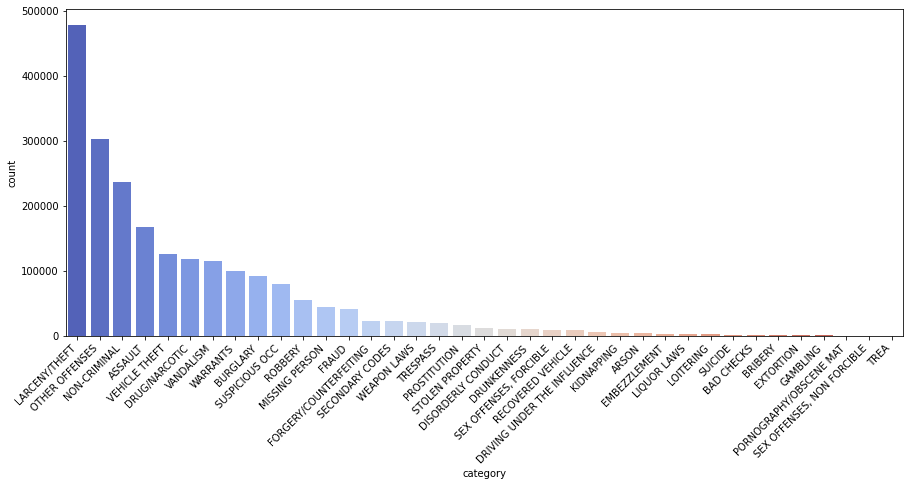

[Text(0, 0, 'LARCENY/THEFT'),
 Text(0, 0, 'OTHER OFFENSES'),
 Text(0, 0, 'NON-CRIMINAL'),
 Text(0, 0, 'ASSAULT'),
 Text(0, 0, 'VEHICLE THEFT'),
 Text(0, 0, 'DRUG/NARCOTIC'),
 Text(0, 0, 'VANDALISM'),
 Text(0, 0, 'WARRANTS'),
 Text(0, 0, 'BURGLARY'),
 Text(0, 0, 'SUSPICIOUS OCC'),
 Text(0, 0, 'ROBBERY'),
 Text(0, 0, 'MISSING PERSON'),
 Text(0, 0, 'FRAUD'),
 Text(0, 0, 'FORGERY/COUNTERFEITING'),
 Text(0, 0, 'SECONDARY CODES'),
 Text(0, 0, 'WEAPON LAWS'),
 Text(0, 0, 'TRESPASS'),
 Text(0, 0, 'PROSTITUTION'),
 Text(0, 0, 'STOLEN PROPERTY'),
 Text(0, 0, 'DISORDERLY CONDUCT'),
 Text(0, 0, 'DRUNKENNESS'),
 Text(0, 0, 'SEX OFFENSES, FORCIBLE'),
 Text(0, 0, 'RECOVERED VEHICLE'),
 Text(0, 0, 'DRIVING UNDER THE INFLUENCE'),
 Text(0, 0, 'KIDNAPPING'),
 Text(0, 0, 'ARSON'),
 Text(0, 0, 'EMBEZZLEMENT'),
 Text(0, 0, 'LIQUOR LAWS'),
 Text(0, 0, 'LOITERING'),
 Text(0, 0, 'SUICIDE'),
 Text(0, 0, 'BAD CHECKS'),
 Text(0, 0, 'BRIBERY'),
 Text(0, 0, 'EXTORTION'),
 Text(0, 0, 'GAMBLING'),
 Text(0, 0, 'PORNOGRAPHY/OBSCENE MAT'),
 Text(0, 0, 'SEX OFFENSES, NON FORCIBLE'),
 Text(0, 0, 'TREA')]

In [0]:
import seaborn as sns
fig_dims = (15,6)
fig = plt.subplots(figsize=fig_dims)
spark_df_q1_plot = spark_df_q1.toPandas()
chart=sns.barplot(x = 'category', y = 'count', palette= 'coolwarm',data = spark_df_q1_plot)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')


#### Q2 question (OLAP)
Counts the number of crimes for different district, and visualize your results

In [0]:
spark_sql_q2 = spark.sql("SELECT PdDistrict, COUNT(*) AS Count FROM sf_crime GROUP BY 1 ORDER BY 2 DESC")
display(spark_sql_q2)


PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435
CENTRAL,221923
BAYVIEW,205480
TENDERLOIN,186954
INGLESIDE,181092
TARAVAL,155461
PARK,119698
RICHMOND,112804


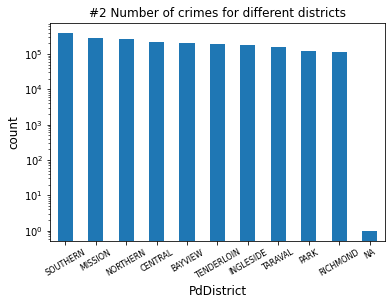

In [0]:
import matplotlib.pyplot as plt
crimes_dis_pd_df = spark_sql_q2.toPandas()
plt.figure()
ax = crimes_dis_pd_df.plot(kind = 'bar',x='PdDistrict',y = 'Count',logy= True,legend = False, align = 'center')
ax.set_ylabel('count',fontsize = 12)
ax.set_xlabel('PdDistrict',fontsize = 12)
plt.xticks(fontsize=8, rotation=30)
plt.title('#2 Number of crimes for different districts')
display()

#### Q3 question (OLAP)
Count the number of crimes each "Sunday" at "SF downtown".   
hint 1: SF downtown is defiend  via the range of spatial location. For example, you can use a rectangle to define the SF downtown, or you can define a cicle with center as well. Thus, you need to write your own UDF function to filter data which are located inside certain spatial range. You can follow the example here: https://changhsinlee.com/pyspark-udf/

hint 2: SF downtown physical location rectangle a < x < b  and c < y < d. thus, San Francisco Latitude and longitude coordinates are: 37.773972, -122.431297. X and Y represents each. So we assume SF downtown spacial range: X (-122.4213,-122.4313), Y(37.7540,37.7740).

In [0]:
df_opt2 = df_opt1[['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time', 'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location']]
display(df_opt2)
df_opt2.createOrReplaceTempView("sf_crime")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90)
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603)
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123)
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449)
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459)
040378011,ASSAULT,BATTERY,Friday,12/12/2003,12:00,SOUTHERN,NONE,500 Block of I-80,-122.386667033903,37.7898821569191,POINT (-122.38666703390301 37.7898821569191)
041476690,VEHICLE THEFT,STOLEN TRUCK,Thursday,12/30/2004,19:00,BAYVIEW,NONE,100 Block of KAREN CT,-122.407531316146,37.723291086507,POINT (-122.40753131614602 37.723291086507)
160101273,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822)
170049243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174)
160658280,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647)


In [0]:
from pyspark.sql.functions import hour, date_format, to_date, month, year
# add new columns to convert Date to date format
df_new = df_opt2.withColumn("IncidentDate",to_date(df_opt2.Date, "MM/dd/yyyy")) 
# extract month and year from incident date
df_new = df_new.withColumn('Month',month(df_new['IncidentDate']))
df_new = df_new.withColumn('Year', year(df_new['IncidentDate']))
display(df_new.take(5))
df_new.createOrReplaceTempView("sf_crime1")

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011


In [0]:
# sql way
spark_sql_q3 = spark.sql("SELECT IncidentDate, DayOfWeek, COUNT(*) AS Count FROM sf_crime1 WHERE DayOfWeek = 'Sunday' \
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 \
                          GROUP BY IncidentDate, DayOfWeek ORDER BY IncidentDate")

In [0]:
display(spark_sql_q3)

IncidentDate,DayOfWeek,Count
2003-01-05,Sunday,13
2003-01-12,Sunday,20
2003-01-19,Sunday,17
2003-01-26,Sunday,13
2003-02-02,Sunday,14
2003-02-09,Sunday,22
2003-02-16,Sunday,12
2003-02-23,Sunday,14
2003-03-02,Sunday,16
2003-03-09,Sunday,8


In [0]:
%sql select month(IncidentDate), count(*) AS Count from sf_crime1 WHERE DayOfWeek = 'Sunday' 
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 
                          GROUP BY month(IncidentDate) ORDER BY  month(IncidentDate),Count desc

month(IncidentDate),Count
1,951
2,837
3,923
4,956
5,905
6,979
7,873
8,880
9,856
10,959


late June: 54+33+31+28= 146  July 4th is Independence Day, people tend to have a vocation around this holiday and trabel to SF city.

December10/11 and new year: 35+28+31= 94 Some companies may approve employees's paid time off before Christmas holiday, and the whole December is holiday season. travel to SF is a choice.

the whole July: 29+26+26= 81 July 4th is Independence Day, it is time for travel.

the whole September: 29+26+26= 81 the first Monday of September is also another holiday called Labor Day.

late October: 33+31= 64 the second Monday of October is Columbus Day that is another holiday.

why travel cause crime? especially for June, October and Janaury? Cause when you are not at home, it gives crimer a chance to approach you and especially when you have a tight vocation schedule you will lose your awareness to take care all of the stuff. it also reflects that people like to travel from the whole second half of the year.

In [0]:

%sql select year(IncidentDate), month(IncidentDate), count(*) AS Count from sf_crime1 WHERE DayOfWeek = 'Sunday' 
                          AND X > -122.4313 AND X < -122.4213 AND Y > 37.7540 AND Y < 37.7740 
                          GROUP BY year(IncidentDate), month(IncidentDate) ORDER BY year(IncidentDate), month(IncidentDate),Count desc

year(IncidentDate),month(IncidentDate),Count
2003,1,63
2003,2,62
2003,3,71
2003,4,39
2003,5,40
2003,6,64
2003,7,52
2003,8,40
2003,9,40
2003,10,54


2012, 2013, 2016, 2017 is crazy. what's happened? Oh, it is actually the election year. I still remember when I first land to US and I have no idea about America election. But I do remember lots of students sit in the college plaza to watch for the vote activity. And most of them felt sad when it turns out that the result did not meet their expecatation. 
I may think it is reasonable to make a hypothesis that a new presidential election is prone to social unrest. Also, see what happened this year, 2020 is also a election year. Do you feel the whole socitey is safe enough? Not, right.

#### Q4 question (OLAP)
Analysis the number of crime in each month of 2015, 2016, 2017, 2018. Then, give your insights for the output results. What is the business impact for your result?

In [0]:
years = [2015, 2016, 2017, 2018]
df_years = df_new[df_new.Year.isin(years)]
display(df_years.take(10))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year
160101273,BURGLARY,"BURGLARY, UNLAWFUL ENTRY",Wednesday,02/03/2016,20:30,MISSION,"ARREST, BOOKED",2300 Block of 16TH ST,-122.40952991327822,37.76571843952822,POINT (-122.40952991327822 37.76571843952822),2016-02-03,2,2016
170049243,LARCENY/THEFT,PETTY THEFT FROM LOCKED AUTO,Wednesday,01/18/2017,18:20,TARAVAL,NONE,NORIEGA ST / SUNSET BL,-122.49522504431104,37.75341185338174,POINT (-122.49522504431104 37.75341185338174),2017-01-18,1,2017
160658280,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Sunday,08/14/2016,21:00,TARAVAL,NONE,3200 Block of 20TH AV,-122.47564746078615,37.72852806274646,POINT (-122.47564746078615 37.72852806274647),2016-08-14,8,2016
180322603,DRUG/NARCOTIC,POSSESSION OF HEROIN,Tuesday,05/01/2018,13:27,SOUTHERN,"ARREST, BOOKED",600 Block of STEVENSON ST,-122.41265189435406,37.77951316688882,POINT (-122.41265189435406 37.77951316688882),2018-05-01,5,2018
176125180,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Tuesday,05/16/2017,13:00,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,POINT (-122.46620466789287 37.772540539159316),2017-05-16,5,2017
176290868,LARCENY/THEFT,GRAND THEFT OF PROPERTY,Wednesday,11/01/2017,02:00,SOUTHERN,NONE,3RD ST / TOWNSEND ST,-122.39275357357432,37.778851867022745,POINT (-122.39275357357432 37.778851867022745),2017-11-01,11,2017
170144837,DRIVING UNDER THE INFLUENCE,DRIVING WHILE UNDER THE INFLUENCE OF ALCOHOL,Monday,02/20/2017,00:50,BAYVIEW,"ARREST, BOOKED",200 Block of WILLIAMS AV,-122.39774442710336,37.729934693604356,POINT (-122.39774442710336 37.729934693604356),2017-02-20,2,2017
176145940,VANDALISM,"MALICIOUS MISCHIEF, VANDALISM",Tuesday,06/06/2017,08:00,NORTHERN,NONE,2400 Block of GREENWICH ST,-122.43998197414118,37.79837263684663,POINT (-122.43998197414118 37.798372636846636),2017-06-06,6,2017
160067039,OTHER OFFENSES,"PERMIT VIOLATION, POLICE (GENERAL)",Saturday,01/23/2016,22:34,NORTHERN,"ARREST, BOOKED",FILLMORE ST / GREENWICH ST,-122.43587022018636,37.79895141428513,POINT (-122.43587022018636 37.79895141428513),2016-01-23,1,2016
176206144,LARCENY/THEFT,GRAND THEFT FROM LOCKED AUTO,Wednesday,08/09/2017,09:30,RICHMOND,NONE,500 Block of JOHNFKENNEDY DR,-122.46620466789287,37.772540539159316,POINT (-122.46620466789287 37.772540539159316),2017-08-09,8,2017


In [0]:
spark_df_q4 = df_years.groupby(['Year', 'Month']).count().orderBy('Year','Month')
display(spark_df_q4)

Year,Month,count
2015,1,13181
2015,2,11882
2015,3,13463
2015,4,12526
2015,5,13318
2015,6,12853
2015,7,12949
2015,8,13317
2015,9,12476
2015,10,12697


In [0]:
df_years.createOrReplaceTempView("sf_crime2")
fig_dims = (20,6)

In [0]:
%sql select distinct(category) as type, count(*) as Count, year from sf_crime2 where Year in (2015, 2016, 2017, 2018) group by 1,3 order by 2 desc

type,Count,year
LARCENY/THEFT,47714,2017
LARCENY/THEFT,41980,2015
LARCENY/THEFT,40365,2016
OTHER OFFENSES,20052,2015
OTHER OFFENSES,19337,2016
NON-CRIMINAL,19098,2015
OTHER OFFENSES,17890,2017
NON-CRIMINAL,17871,2016
NON-CRIMINAL,17328,2017
LARCENY/THEFT,13610,2018


In [0]:
%sql select count(*) as Count, year, month from sf_crime2 where Year in (2015, 2016, 2017, 2018) and category='LARCENY/THEFT' group by 2,3 order by 2,3

Count,year,month
3705,2015,1
3276,2015,2
3811,2015,3
3478,2015,4
3837,2015,5
3749,2015,6
3873,2015,7
3694,2015,8
3422,2015,9
3264,2015,10


the business impact is the theft contributes to the most crime portion. And the 47th Act signed by the governor in the California take on effect at Nov 2014. After 2015 winter, the crime number is boosting under theft category until Jan 2018.The reason for the decline in crime rate since 2018 may be that the San Francisco Police Department has increased uniformed police patrols.

#### Q5 question (OLAP)
Analysis the number of crime w.r.t the hour in certian day like 2015/12/15, 2016/12/15, 2017/12/15. Then, give your travel suggestion to visit SF.

In [0]:
from pyspark.sql.functions import to_timestamp
# add new columns to convert Time to hour format
df_new1 = df_new.withColumn('IncidentTime', to_timestamp(df_new['Time'],'HH:mm')) 
# extract hour from incident time
df_new2 = df_new1.withColumn('Hour',hour(df_new1['IncidentTime']))
display(df_new2.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year,IncidentTime,Hour
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003,1970-01-01T10:00:00.000+0000,10
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005,1970-01-01T12:20:00.000+0000,12
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006,1970-01-01T00:55:00.000+0000,0
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007,1970-01-01T00:01:00.000+0000,0
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011,1970-01-01T11:00:00.000+0000,11


In [0]:
dates = ['12/15/2015','12/15/2016','12/15/2017']
df_days = df_new2[df_new2.Date.isin(dates)]
spark_df_q5_1 = df_days.groupby('Hour','Date').count().orderBy('Date','Hour')
display(spark_df_q5_1)

Hour,Date,count
0,12/15/2015,15
1,12/15/2015,6
2,12/15/2015,5
3,12/15/2015,4
4,12/15/2015,10
5,12/15/2015,3
6,12/15/2015,4
7,12/15/2015,8
8,12/15/2015,12
9,12/15/2015,10


from the plot we can see that:
for 2015, the peak time of crime is 12,14,16,19. it just from noon to the sunset.
for 2016, the peak time of crime is 12,18,19. it concentrate on 18, the dinner time.
for 2017, the peak time of crime is 0, 8,10,15,16,17,18,19,22,23. the data is more even and the interesting trend is that it seems the crime has more records during the midnight, from 22 to 24. I think at that time there is less police power and the crimers are also easy to steal stuff from the dark enviroment.

#### Q6 question (OLAP)
(1) Step1: Find out the top-3 danger district  
(2) Step2: find out the crime event w.r.t category and time (hour) from the result of step 1  
(3) give your advice to distribute the police based on your analysis results.

In [0]:
#sql way
spark_sql_q6_s1 = spark.sql( """
                             SELECT PdDistrict, COUNT(*) as Count
                             FROM sf_crime
                             GROUP BY 1
                             ORDER BY 2 DESC
                             LIMIT 3 
                             """ )
display(spark_sql_q6_s1)


PdDistrict,Count
SOUTHERN,390692
MISSION,288985
NORTHERN,266435


In [0]:
df_new2.createOrReplaceTempView("sf_crime2")
display(df_new2.take(5))

IncidntNum,Category,Descript,DayOfWeek,Date,Time,PdDistrict,Resolution,Address,X,Y,Location,IncidentDate,Month,Year,IncidentTime,Hour
031147516,LARCENY/THEFT,PETTY THEFT FROM A BUILDING,Sunday,09/28/2003,10:00,SOUTHERN,NONE,1ST ST / BRANNAN ST,-120.5,90,POINT (-120.50000000000001 90),2003-09-28,9,2003,1970-01-01T10:00:00.000+0000,10
050697011,ASSAULT,BATTERY,Wednesday,06/22/2005,12:20,NORTHERN,NONE,1200 Block of EDDY ST,-122.428223303176,37.7818959488603,POINT (-122.42822330317601 37.7818959488603),2005-06-22,6,2005,1970-01-01T12:20:00.000+0000,12
060747292,ASSAULT,ASSAULT,Saturday,07/15/2006,00:55,CENTRAL,NONE,1600 Block of POWELL ST,-122.410672425337,37.799788690123,POINT (-122.41067242533701 37.799788690123),2006-07-15,7,2006,1970-01-01T00:55:00.000+0000,0
071035363,ASSAULT,STALKING,Tuesday,09/25/2007,00:01,TARAVAL,NONE,400 Block of ULLOA ST,-122.458226300605,37.7413616001449,POINT (-122.458226300605 37.7413616001449),2007-09-25,9,2007,1970-01-01T00:01:00.000+0000,0
110824152,MISSING PERSON,MISSING ADULT,Saturday,09/24/2011,11:00,TARAVAL,LOCATED,3200 Block of SAN JOSE AV,-122.459172646607,37.7082001648459,POINT (-122.459172646607 37.7082001648459),2011-09-24,9,2011,1970-01-01T11:00:00.000+0000,11


In [0]:
%sql select category, hour, count(*) from sf_crime2 where PdDistrict in ('SOUTHERN','MISSION','NORTHERN') group by category, hour 
order by category, hour

category,hour,count(1)
ARSON,0,84
ARSON,1,77
ARSON,2,84
ARSON,3,95
ARSON,4,74
ARSON,5,60
ARSON,6,50
ARSON,7,28
ARSON,8,34
ARSON,9,28


the lunch time and dinner time, espcially the dinner time will have more crime cases. And the most of them are theft and assault. Cause the California law won't arrest the crimer who steal something valued under 900 dollars. people will get off from work and go to grocery store, eat dinner outset or hang out with friends. Southern Area probably has less police power and where people live. The route from office to home can describle like from Mission Area to Southern Area. People need to be careful when they go out of the office, take public traffic, and walk to home with awareness. don't look at cellphone, instead should look around the surroundings.

#### Q7 question (OLAP)
For different category of crime, find the percentage of resolution. Based on the output, give your hints to adjust the policy.

Below is the resolution count for each category.

In [0]:
%sql select category, count(*) from sf_crime2 
group by category order by count(*) desc limit 10

category,count(1)
LARCENY/THEFT,143669
OTHER OFFENSES,62742
NON-CRIMINAL,59536
ASSAULT,38133
VANDALISM,28697
VEHICLE THEFT,21526
BURGLARY,19618
WARRANTS,19158
SUSPICIOUS OCC,18937
DRUG/NARCOTIC,13130


In [0]:
%sql select distinct(resolution) as resolve from sf_crime2

resolve
EXCEPTIONAL CLEARANCE
"ARREST, BOOKED"
PROSECUTED FOR LESSER OFFENSE
LOCATED
UNFOUNDED
DISTRICT ATTORNEY REFUSES TO PROSECUTE
PSYCHOPATHIC CASE
COMPLAINANT REFUSES TO PROSECUTE
"ARREST, CITED"
PROSECUTED BY OUTSIDE AGENCY


Here, 'None' takes the most portion of the data. I think they are the cases that are not resolved. it is still open in investigation. So we exclude it. usually, to analyze a problem, we need to know 80/20 rule. focus on the 80% of the data and ignore the cases with less data. So I will pick up the top 10 categories and analyze the resolution percentage. The rest of the category will discover in the future if i have more time.

In [0]:
%sql select distinct Category, Resolution, count(*) over (PARTITION BY Category, Resolution) as sum_div from sf_crime2
where Resolution != 'NONE'
order by Category, sum_div desc

Category,Resolution,sum_div
ARSON,"ARREST, BOOKED",630
ARSON,UNFOUNDED,25
ARSON,"ARREST, CITED",17
ARSON,PSYCHOPATHIC CASE,17
ARSON,PROSECUTED BY OUTSIDE AGENCY,3
ARSON,NOT PROSECUTED,3
ARSON,COMPLAINANT REFUSES TO PROSECUTE,3
ARSON,EXCEPTIONAL CLEARANCE,2
ARSON,PROSECUTED FOR LESSER OFFENSE,1
ASSAULT,"ARREST, BOOKED",62809


In [0]:
%sql with cte_1 as 
(select distinct Category, Resolution, count(*) over (PARTITION BY Category, Resolution) as sum_div, 
count(*) over (PARTITION BY Category) as cat_div
from sf_crime2
where Resolution != 'NONE'
order by Category, sum_div desc)
select distinct Category, Resolution, round(sum_div/cat_div,4) from cte_1
where Category in (select category from (select category, count(*) from sf_crime2 where Resolution != 'NONE'
group by category order by count(*) desc limit 10) as a)


Category,Resolution,"round((CAST(sum_div AS DOUBLE) / CAST(cat_div AS DOUBLE)), 4)"
MISSING PERSON,"ARREST, BOOKED",0.0497
MISSING PERSON,"ARREST, CITED",0.0131
MISSING PERSON,COMPLAINANT REFUSES TO PROSECUTE,5.0E-4
MISSING PERSON,DISTRICT ATTORNEY REFUSES TO PROSECUTE,7.0E-4
MISSING PERSON,EXCEPTIONAL CLEARANCE,0.012
MISSING PERSON,LOCATED,0.8665
MISSING PERSON,NOT PROSECUTED,8.0E-4
MISSING PERSON,PROSECUTED BY OUTSIDE AGENCY,0.0014
MISSING PERSON,PSYCHOPATHIC CASE,0.0188
MISSING PERSON,UNFOUNDED,0.0365


the most cases's resolution is arrest, booked. it means it is easy to make a judgement. but missing person and non-criminal has a variance.
most missing person's result is located. is it means dead? how to prevent it and how to rescue before we found a dead body? 
also, for non-criminal, the most cases are psychopathic cases. Do we need to pay attention to people who has mental health problems? Are they tend to attack people? where do they live and how to make residential areas more safe? 
Besides, we may also think about to adjust the police power to the poor area and protect the people there.

### Conclusion. 
Use four sentences to summary your work. Like what you have done, how to do it, what the techinical steps, what is your business impact. 
More details are appreciated. You can think about this a report for your manager. Then, you need to use this experience to prove that you have strong background on big  data analysis.  
Point 1:  what is your story ? and why you do this work ?   
Point 2:  how can you do it ?  keywords: Spark, Spark SQL, Dataframe, Data clean, Data visulization, Data size, clustering, OLAP,   
Point 3:  what do you learn from the data ?  keywords: crime, trend, advising, conclusion, runtime

I generated reports from different topics and perspectives. such as time, district, year, resolution type, crime type and so on. I cleaned the data, process data to integret the format, and run sql queries to check the data pattern or trends, then visulize the results.

I found several business impact that we may need to have notice:

1 election year will need more polce power to the unrest society.

2 lunch time, dinner time is the best time for crimer to take action. need police power patrol around the restaurant plazas.

3 travel time, holiday season is also a peak time for crimes. 

the insight is when you want to have a rest and relax, the crime won't let you to take a rest. Just be careful.